# Importing the needed libraries and reading the data

In [181]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)

from sklearn.linear_model import LinearRegression

In [182]:
students_data = pd.read_csv("student-mat.csv") 

In [183]:
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [184]:
#seeing if there are null values in the dataset
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Preprocessing the data

Visualizing the correlations of numerical data to drop the least contributing

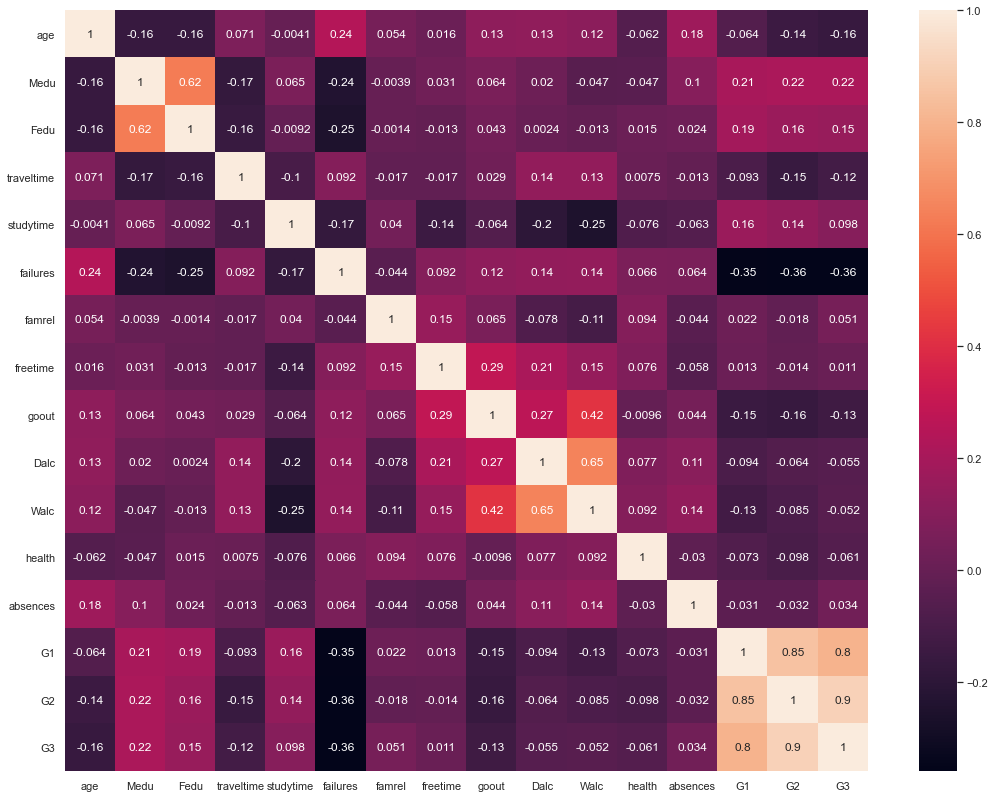

In [185]:
plt.figure(figsize=(18, 14))
sns.set(font_scale=1)
sns.heatmap(students_data.corr(), annot = True)
plt.show()

In [186]:
#dropping any column that has correlation less than absolute value of 0.09
corr = students_data.corr()
G3Corr = corr['G3']
toBeDropped = []
for index, val in enumerate(G3Corr):
    if(abs(val) < 0.09):
        toBeDropped.append(corr.columns[index])
        
students_data.drop(columns=toBeDropped, inplace=True)

Encoding

In [187]:
categoricalColumns = [students_data.columns[index] for index, dtype in enumerate(students_data.dtypes) if dtype == 'object']


In [188]:
lEncoder = LabelEncoder()
   
for c in categoricalColumns:
    if(students_data[c].nunique() == 2):
        students_data[c] = lEncoder.fit_transform(students_data[c])
    else:
        students_data[c] = students_data[c].apply(lambda x: c[0] + "_" + x)
        dummies = pd.get_dummies(students_data[c])
        students_data = pd.concat([students_data, dummies], axis=1)
        students_data.drop(c, axis=1, inplace = True)


Checking the correlations again after encoding the categorical columns

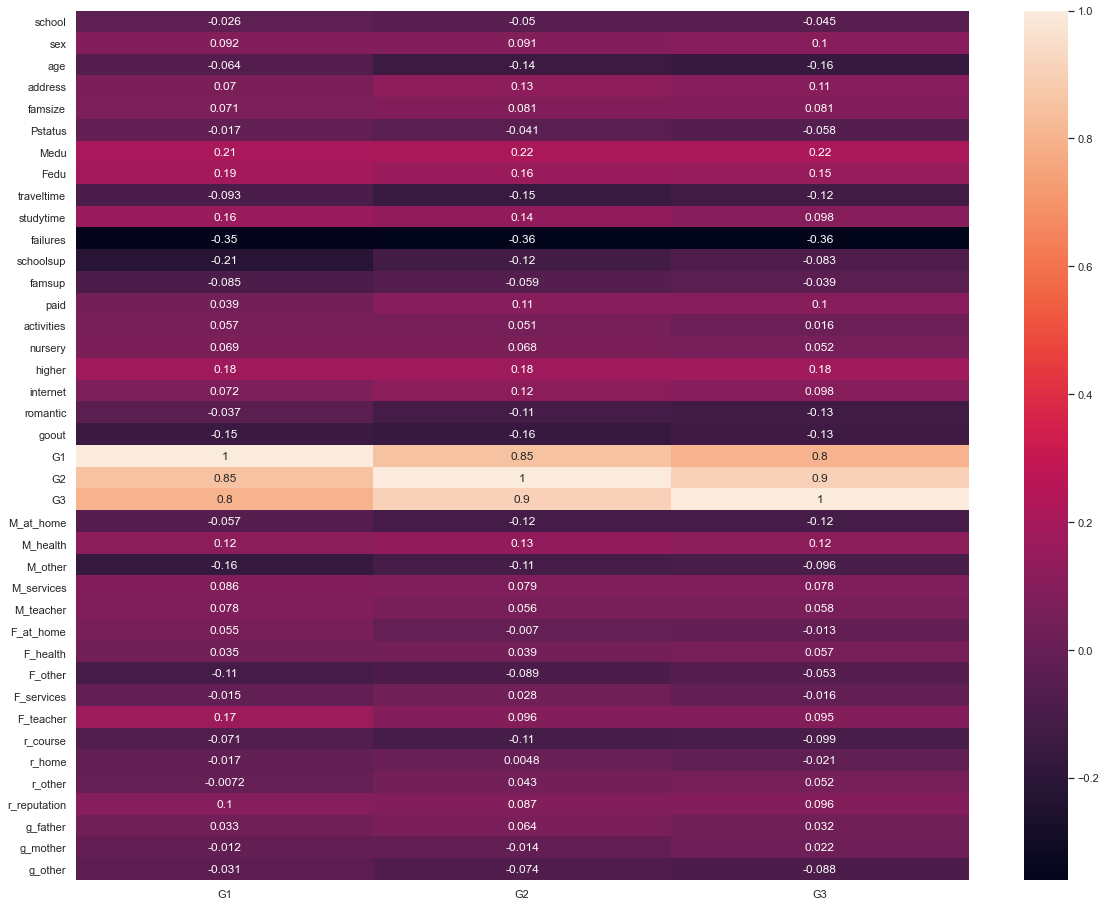

In [190]:
plt.figure(figsize=(20, 16))
sns.set(font_scale=1)
sns.heatmap(students_data.corr()[['G1', 'G2', 'G3']], annot = True)
plt.show()

In [191]:
#dropping any column that has correlation less than absolute value of 0.09
corr = students_data.corr()
G3Corr = corr['G3']
toBeDropped = []
for index, val in enumerate(G3Corr):
    if(abs(val) < 0.09):
        toBeDropped.append(corr.columns[index])
students_data.drop(columns=toBeDropped, inplace=True)

# Choosing the model and training

In [202]:
Y = students_data['G3']
X = students_data.drop('G3', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

In [203]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [204]:
print(model.score(X_test, Y_test))

0.8400282787621434
